In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

pd.set_option('display.max_rows', 20)

In [2]:
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [3]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series.dropna())
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','Number of Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] < 0.05:
        print("p-value < 0.05. Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("p-value >= 0.05. Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [4]:
data = pd.read_csv("shampoo.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)

            Sales
Month            
1901-01-01  266.0
1901-02-01  145.9
1901-03-01  183.1
1901-04-01  119.3
1901-05-01  180.3
...           ...
1903-08-01  407.6
1903-09-01  682.0
1903-10-01  475.3
1903-11-01  581.3
1903-12-01  646.9

[36 rows x 1 columns]


<AxesSubplot:xlabel='Month'>

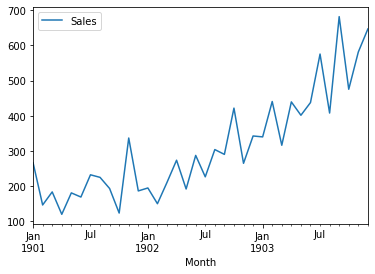

In [5]:
print(data)
data.plot()

In [6]:
adf_check(data["Sales"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : 3.0601420836411797
p-value : 1.0
Number of Lags Used : 10
Number of Observations Used : 25
p-value >= 0.05. Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


            Sales  diff_1
Month                    
1901-01-01  266.0     NaN
1901-02-01  145.9  -120.1
1901-03-01  183.1    37.2
1901-04-01  119.3   -63.8
1901-05-01  180.3    61.0
...           ...     ...
1903-08-01  407.6  -167.9
1903-09-01  682.0   274.4
1903-10-01  475.3  -206.7
1903-11-01  581.3   106.0
1903-12-01  646.9    65.6

[36 rows x 2 columns]


<AxesSubplot:xlabel='Month'>

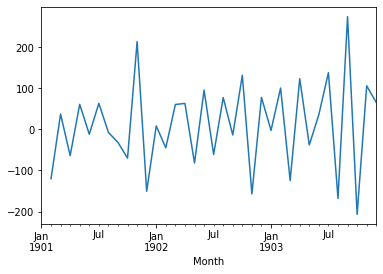

In [7]:
data["diff_1"] = data["Sales"].diff()
print(data)
data["diff_1"].plot()

In [8]:
adf_check(data["diff_1"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.249074055553854
p-value : 1.7998574141687034e-10
Number of Lags Used : 1
Number of Observations Used : 33
p-value < 0.05. Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


            Sales  regression_preds  regression_diff
Month                                               
1901-01-01  266.0        197.484116        68.515884
1901-02-01  145.9        193.060121       -47.160121
1901-03-01  183.1        189.606894        -6.506894
1901-04-01  119.3        187.124437       -67.824437
1901-05-01  180.3        185.612748        -5.312748
...           ...               ...              ...
1903-08-01  407.6        511.747728      -104.147728
1903-09-01  682.0        537.417564       144.582436
1903-10-01  475.3        564.058168       -88.758168
1903-11-01  581.3        591.669541       -10.369541
1903-12-01  646.9        620.251683        26.648317

[36 rows x 3 columns]


<AxesSubplot:xlabel='Month'>

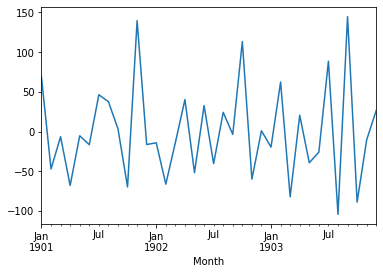

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(len(data["Sales"])).reshape(-1, 1)
y = data["Sales"].values

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)

reg = LinearRegression().fit(X_poly, y)
preds = reg.predict(X_poly)
data["regression_preds"] = preds
data["regression_diff"] = data["Sales"] - preds
print(data[["Sales", "regression_preds", "regression_diff"]])
data["regression_diff"].plot()

In [10]:
adf_check(data["regression_diff"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.135307205357343
p-value : 3.433335343019641e-10
Number of Lags Used : 9
Number of Observations Used : 26
p-value < 0.05. Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary
